In [42]:
# import packages
import folium
import time
from folium import plugins
import numpy as np
import matplotlib.pyplot as plt


In [299]:
# main function to plot data
# currently hardcodes ratio of LAI/PAI for each IGBP class , need to make this a dictionary
# uncertainties originally given as a range are converted to 1 sigma by dividing range by 4 - implies range if 95%ile coverage of residuals
# uncertainties are combined assuming indpenedence
def plotData(dataList,xvar,yvar,percentile,fileName) :
    fig = plt.figure()
    if xvar == 'LAI_Miller' :
        plt.plot([0,6],[0,6],'k--')
        plt.ylim(0,6)
        plt.xlim(0,6)
        plt.fill_between(np.arange(0,6,0.1) ,np.minimum(0.75*np.arange(0,6,0.1),np.arange(0,6,0.1)-0.75),np.maximum(1.25*np.arange(0,6,0.1),np.arange(0,6,0.1)+0.75),color = 'gray',alpha = 0.1)
        plt.fill_between(np.arange(0,6,0.1) ,np.minimum(0.80*np.arange(0,6,0.1),np.arange(0,6,0.1)-0.50),np.maximum(1.20*np.arange(0,6,0.1),np.arange(0,6,0.1)+0.50),color = 'gray',alpha = 0.3)
        plt.fill_between(np.arange(0,6,0.1) ,np.minimum(0.85*np.arange(0,6,0.1),np.arange(0,6,0.1)-0.25),np.maximum(1.15*np.arange(0,6,0.1),np.arange(0,6,0.1)+0.25),color = 'gray',alpha = 0.5)
        plt.ylabel('LAI SL2P')
        plt.xlabel('LAI In-Situ')
    elif xvar == "fcover_Total" : 
        plt.plot([0,1],[0,1],'k--')
        plt.ylim(0,1)
        plt.xlim(0,1)
        plt.fill_between(np.arange(0,1,0.01) ,np.minimum(0.8*np.arange(0,1,0.01),np.arange(0,1,0.01)-0.10),np.maximum(1.2*np.arange(0,1,0.01),np.arange(0,1,0.01)+0.10),color = 'gray',alpha = 0.1)
        plt.fill_between(np.arange(0,1,0.01) ,np.minimum(0.85*np.arange(0,1,0.01),np.arange(0,1,0.01)-0.075),np.maximum(1.15*np.arange(0,1,0.01),np.arange(0,1,0.01)+0.075),color = 'gray',alpha = 0.3)
        plt.fill_between(np.arange(0,1,0.01) ,np.minimum(0.90*np.arange(0,1,0.01),np.arange(0,1,0.01)-0.05),np.maximum(1.10*np.arange(0,1,0.01),np.arange(0,1,0.01)+0.05),color = 'gray',alpha = 0.5)
        plt.ylabel('FCOVER SL2P')
        plt.xlabel('FCOVER In-Situ')
    elif xvar == 'fIPAR' :
        plt.plot([0,1],[0,1],'k--')
        plt.ylim(0,1)
        plt.xlim(0,1)
        plt.fill_between(np.arange(0,1,0.01) ,np.minimum(0.8*np.arange(0,1,0.01),np.arange(0,1,0.01)-0.10),np.maximum(1.2*np.arange(0,1,0.01),np.arange(0,1,0.01)+0.10),color = 'gray',alpha = 0.1)
        plt.fill_between(np.arange(0,1,0.01) ,np.minimum(0.85*np.arange(0,1,0.01),np.arange(0,1,0.01)-0.075),np.maximum(1.15*np.arange(0,1,0.01),np.arange(0,1,0.01)+0.075),color = 'gray',alpha = 0.3)
        plt.fill_between(np.arange(0,1,0.01) ,np.minimum(0.95*np.arange(0,1,0.01),np.arange(0,1,0.01)-0.05),np.maximum(1.05*np.arange(0,1,0.01),np.arange(0,1,0.01)+0.05),color = 'gray',alpha = 0.5)
        plt.ylabel('FAPAR SL2P')
        plt.xlabel('FIPAR In-Situ')
    elif  xvar == 'LAIE_Miller' :
        plt.plot([0,4],[0,4],'k--')
        plt.ylim(0,4)
        plt.xlim(0,4)
        plt.fill_between(np.arange(0,6,0.1) ,np.minimum(0.75*np.arange(0,6,0.1),np.arange(0,6,0.1)-0.75),np.maximum(1.25*np.arange(0,6,0.1),np.arange(0,6,0.1)+0.75),color = 'gray',alpha = 0.1)
        plt.fill_between(np.arange(0,6,0.1) ,np.minimum(0.80*np.arange(0,6,0.1),np.arange(0,6,0.1)-0.50),np.maximum(1.20*np.arange(0,6,0.1),np.arange(0,6,0.1)+0.50),color = 'gray',alpha = 0.3)
        plt.fill_between(np.arange(0,6,0.1) ,np.minimum(0.85*np.arange(0,6,0.1),np.arange(0,6,0.1)-0.25),np.maximum(1.15*np.arange(0,6,0.1),np.arange(0,6,0.1)+0.25),color = 'gray',alpha = 0.5)
        plt.ylabel('LAIe SL2P')
        plt.xlabel('LAIe In-Situ')
    else :
        plt.plot([0,1],[0,1],'k--')
        plt.ylim(0,1)
        plt.xlim(0,1)
        
    error = np.zeros(len(dataList))
    correct = np.zeros(len(dataList)) 
    for n in range(0,len(dataList)) :
    #for n in range(0,1) :
        
        # check there is satellite data
        if ( (dataList[n][yvar])[2]['data'] ) :
            
            # for fAPAR
            if (yvar == 'samplefAPAR') :
                
                # check there is insitu data
                if (dataList[n]['FIPAR_down'] != -999 ) or (dataList[n]['FIPAR_up'] != -999 ) :
                    
                    # determine total FIPAR and FIPAR err
                    xup = 0
                    xdown = 0
                    xerrorup = 0
                    xerrordown = 0
                    if (dataList[n]['FIPAR_up'] != -999 ) :
                        xup = float(dataList[n]['FIPAR_up']) 
                        if (dataList[n]['FIPAR_up_err'] != -999 ) :
                            xerrorup = (float(dataList[n]['FIPAR_up_err']))**2
                        if (dataList[n]['FIPAR_down'] != -999 ) :
                            xdown = float(dataList[n]['FIPAR_down'])
                            if (dataList[n]['FIPAR_down_err'] != -999 ) :
                                xerrordown = (float(dataList[n]['FIPAR_down_err']))**2 
                    else :
                        xdown = float(dataList[n]['FIPAR_down']) 
                        if (dataList[n]['FIPAR_down_err'] != -999 ) :
                            xerrordown = float(dataList[n]['FIPAR_down_err'])**2   
                    x = max(xup,xdown)
                    #print(xup,xdown)
                    #print(xerrorup,xerrordown)
                    xerr = (max(0,((xup*xerrorup+xdown*xerrordown)/(xup+xdown))))**0.5

                        
                    # determine residuals for each satellite matchup
                    residual = np.array((dataList[n][yvar])[2]['data'])-x
                    residualAbs = np.absolute(residual)
                    yerr =  np.array((dataList[n][yvar])[5]['data'])
                    
                    # only use good matches for stats
                    index = np.where(residualAbs<=np.percentile(residualAbs,percentile))
                    filteredresiduals = residual[index[0]]
                    yerr = yerr[index[0]]
                    
                    #print(filteredresiduals)
                    error[n] = np.median(filteredresiduals)
                    y = x + np.median(filteredresiduals)
                    yerr = np.median(yerr)
                    yerr = ((np.ptp(filteredresiduals)/4/(len(residual)**0.5))**2 +  yerr**2)**0.5 #/(len(filteredresiduals)**0.5)
                    correct[n] = np.absolute(error[n])<np.maximum(0.20*x,0.10)

        
                    # set symbol size to clumping index
                    symbolSize = 3
                    if dataList[n]['IGBP_class']== 'Mixed Forest':
                        symbolColour = 'y'
                    elif dataList[n]['IGBP_class']== 'Woody Savannas':
                        symbolColour = 'r'
                    elif dataList[n]['IGBP_class']== 'Evergreen Broadleaf':
                        symbolColour = 'r'
                    elif dataList[n]['IGBP_class']== 'Deciduous Broadleaf':
                        symbolColour = 'r'
                    elif dataList[n]['IGBP_class']== 'Evergreen Needleleaf':
                        symbolColour = 'b'
                    elif dataList[n]['IGBP_class']== 'Deciduous Needleaf':
                        symbolColour = 'b'
                    elif dataList[n]['IGBP_class']== 'Croplands':
                        symbolColour = 'm'
                    elif dataList[n]['IGBP_class']== 'Cropland Mosaics':
                        symbolColour = 'm'
                    elif dataList[n]['IGBP_class']== 'Grasslands':
                        symbolColour = 'm'
                    elif dataList[n]['IGBP_class']== 'Grassland':
                        symbolColour = 'm'
                    elif dataList[n]['IGBP_class']== 'Closed Shrublands':
                        symbolColour = 'm'
                    elif dataList[n]['IGBP_class']== 'Open Shrublands':
                        symbolColour = 'm'
                    elif dataList[n]['IGBP_class']== 'Savannas':
                        symbolColour = 'm'
                    elif dataList[n]['IGBP_class']== 'Permanent Wetlands':
                        symbolColour = 'k'
                    elif dataList[n]['IGBP_class']== 'Tundra':
                        symbolColour = 'k'
                    else :
                        print(dataList[n]['IGBP_class'])
                        symbolColour = 'g'
                        
                    if dataList[n]['Site'] == 'DisneyWildernessPreserve':
                        plt.plot(x,y,symbolColour+'o',markersize =symbolSize )
                    elif dataList[n]['Site'] == 'CentralPlainsExperimentalRange' :
                        plt.plot(x,y,symbolColour+'>',markersize =symbolSize )
                    else :
                        plt.plot(x,y,symbolColour+'o',markersize =symbolSize )
            

                    #print(x,y,xerr,yerr)
                    plt.errorbar(x,y,yerr=yerr,xerr=xerr,fmt = 'k-.',linewidth=0.2)

            # for LAI
            if (xvar == 'LAIe_Miller') :
                
                # check there is insitu data
                if (dataList[n]['LAIe_Miller_down'] != -999 ) or (dataList[n]['LAIe_Miller_up'] != -999 ) :
                    
                    # determine total FIPAR and FIPAR err
                    xup = 0
                    xdown = 0
                    xerrorup = 0
                    xerrordown = 0
                    if (dataList[n]['LAIe_Miller_up'] != -999 ) :
                        xup = float(dataList[n]['LAIe_Miller_up']) 
                        if (dataList[n]['LAIe_Miller_up_err'] != -999 ) :
                            xerrorup = (float(dataList[n]['LAIe_Miller_up_err']))**2
                        if (dataList[n]['LAIe_Miller_down'] != -999 ) :
                            xdown = float(dataList[n]['LAIe_Miller_down'])
                            if (dataList[n]['LAIe_Miller_down_err'] != -999 ) :
                                xerrordown = (float(dataList[n]['LAIe_Miller_down_err']))**2 
                    else :
                        xdown = float(dataList[n]['LAIe_Miller_down']) 
                        if (dataList[n]['LAIe_Miller_down_err'] != -999 ) :
                            xerrordown = float(dataList[n]['LAIe_Miller_down_err'])**2   
                    # adjust pai to lai
                    if dataList[n]['IGBP_class']== 'Mixed Forest':
                        symbolColour = 'y'
                        xup = xup * 0.85
                    elif dataList[n]['IGBP_class']== 'Woody Savannas':
                        symbolColour = 'r'
                        xup = xup * 0.85
                    elif dataList[n]['IGBP_class']== 'Evergreen Broadleaf':
                        symbolColour = 'r'
                        xup = xup * 0.8
                    elif dataList[n]['IGBP_class']== 'Deciduous Broadleaf':
                        symbolColour = 'r'
                        xup = xup * 0.85
                    elif dataList[n]['IGBP_class']== 'Evergreen Needleleaf':
                        symbolColour = 'b'
                        xup = xup * 0.8
                    elif dataList[n]['IGBP_class']== 'Deciduous Needleaf':
                        symbolColour = 'b'
                        xup = xup * 0.8
                    elif dataList[n]['IGBP_class']== 'Croplands':
                        symbolColour = 'm'
                        xup = xup * 0.94
                    elif dataList[n]['IGBP_class']== 'Cropland Mosaics':
                        symbolColour = 'm'
                        xup = xup * 0.94
                    elif dataList[n]['IGBP_class']== 'Grasslands':
                        symbolColour = 'm'
                    elif dataList[n]['IGBP_class']== 'Grassland':
                        symbolColour = 'm'
                    elif dataList[n]['IGBP_class']== 'Closed Shrublands':
                        symbolColour = 'm'
                        xup = xup * 0.9
                    elif dataList[n]['IGBP_class']== 'Open Shrublands':
                        symbolColour = 'm'
                        xup = xup * 0.9
                    elif dataList[n]['IGBP_class']== 'Savannas':
                        symbolColour = 'm'
                        xup = xup * 0.8
                    elif dataList[n]['IGBP_class']== 'Permanent Wetlands':
                        symbolColour = 'k'
                    elif dataList[n]['IGBP_class']== 'Tundra':
                        symbolColour = 'k'
                    else :
                        print(dataList[n]['IGBP_class'])
                        symbolColour = 'g'
                        
                    x = xup+xdown
                    #print(xup,xdown)
                    #print(xerrorup,xerrordown)
                    xerr = (max(0,((xup*xerrorup+xdown*xerrordown)/(xup+xdown))))**0.5

                        
                    # determine residuals for each satellite matchup
                    residual = np.array((dataList[n][yvar])[2]['data'])-x
                    residualAbs = np.absolute(residual)
                    yerr =  np.array((dataList[n][yvar])[5]['data'])
                    
                    # only use good matches for stats
                    index = np.where(residualAbs<=np.percentile(residualAbs,percentile))
                    filteredresiduals = residual[index[0]]
                    yerr = yerr[index[0]]
                    
                    #print(filteredresiduals)
                    error[n] = np.median(filteredresiduals)
                    y = x + np.median(filteredresiduals)
                    yerr = np.median(yerr)
                    yerr = ((np.ptp(filteredresiduals)/4/(len(residual)**0.5))**2 +  yerr**2)**0.5 #/(len(filteredresiduals)**0.5)
                    correct[n] = np.absolute(error[n])<np.maximum(0.20*x,0.10)

                    symbolSize = 3 
                    if dataList[n]['Site'] == 'DisneyWildernessPreserve':
                        plt.plot(x,y,symbolColour+'o',markersize =symbolSize )
                    elif dataList[n]['Site'] == 'CentralPlainsExperimentalRange' :
                        plt.plot(x,y,symbolColour+'>',markersize =symbolSize )
                    else :
                        plt.plot(x,y,symbolColour+'o',markersize =symbolSize )
            

                    #print(x,y,xerr,yerr)
                    plt.errorbar(x,y,yerr=yerr,xerr=xerr,fmt = 'k-.',linewidth=0.2)
    
           # for LAIe
            if (xvar == 'LAI_Miller') :
                
                # check there is insitu data
                if (dataList[n]['LAI_Miller_down'] != -999 ) or (dataList[n]['LAI_Miller_up'] != -999 ) :
                    
                    # determine total FIPAR and FIPAR err
                    xup = 0
                    xdown = 0
                    xerrorup = 0
                    xerrordown = 0
                    if (dataList[n]['LAI_Miller_up'] != -999 ) :
                        xup = float(dataList[n]['LAI_Miller_up']) 
                        if (dataList[n]['LAI_Miller_up_err'] != -999 ) :
                            xerrorup = (float(dataList[n]['LAI_Miller_up_err']))**2
                        if (dataList[n]['LAI_Miller_down'] != -999 ) :
                            xdown = float(dataList[n]['LAI_Miller_down'])
                            if (dataList[n]['LAI_Miller_down_err'] != -999 ) :
                                xerrordown = (float(dataList[n]['LAI_Miller_down_err']))**2 
                    else :
                        xdown = float(dataList[n]['LAI_Miller_down']) 
                        if (dataList[n]['LAI_Miller_down_err'] != -999 ) :
                            xerrordown = float(dataList[n]['LAI_Miller_down_err'])**2   

        
                    # adjust pai to lai
                    if dataList[n]['IGBP_class']== 'Mixed Forest':
                        symbolColour = 'y'
                        xup = xup * 0.85
                        xerrorup = xerrorup + xup *(1-0.85)/4
                        xdown = xdown * 0.90
                        xerrordown = xerrordown + xdown *(1-0.90)/4
                    elif dataList[n]['IGBP_class']== 'Woody Savannas':
                        symbolColour = 'r'
                        xup = xup * 0.85
                        xerrorup = xerrorup + xup *(1-0.85)/4
                        xdown = xdown * 0.90
                        xerrordown = xerrordown + xdown *(1-0.90)/4
                    elif dataList[n]['IGBP_class']== 'Evergreen Broadleaf':
                        symbolColour = 'r'
                        xup = xup * 0.8
                        xerrorup = xerrorup + xup *(1-0.8)/4
                        xdown = xdown * 0.90
                        xerrordown = xerrordown + xdown *(1-0.90)/4
                    elif dataList[n]['IGBP_class']== 'Deciduous Broadleaf':
                        symbolColour = 'r'
                        xup = xup * 0.85
                        xerrorup = xerrorup + xup *(1-0.85)/4
                        xdown = xdown * 0.90
                        xerrordown = xerrordown + xdown *(1-0.90)/4
                    elif dataList[n]['IGBP_class']== 'Evergreen Needleleaf':
                        symbolColour = 'b'
                        xup = xup * 0.8
                        xerrorup = xerrorup + xup *(1-0.8)/4
                        xdown = xdown * 0.90
                        xerrordown = xerrordown + xdown *(1-0.90)/4
                    elif dataList[n]['IGBP_class']== 'Deciduous Needleaf':
                        symbolColour = 'b'
                        xup = xup * 0.8
                        xerrorup = xerrorup + xup *(1-0.8)/4
                        xdown = xdown * 0.90
                        xerrordown = xerrordown + xdown *(1-0.90)/4
                    elif dataList[n]['IGBP_class']== 'Croplands':
                        symbolColour = 'm'
                        xup = xup * 0.94
                        xerrorup = xerrorup + xup *(1-0.94)/4
                    elif dataList[n]['IGBP_class']== 'Cropland Mosaics':
                        symbolColour = 'm'
                        xup = xup * 0.94
                        xerrorup = xerrorup + xup *(1-0.94)/4
                    elif dataList[n]['IGBP_class']== 'Grasslands':
                        symbolColour = 'm'
                    elif dataList[n]['IGBP_class']== 'Grassland':
                        symbolColour = 'm'
                    elif dataList[n]['IGBP_class']== 'Closed Shrublands':
                        symbolColour = 'm'
                        xup = xup * 0.9
                        xerrorup = xerrorup + xup *(1-0.9)/4
                        xdown = xdown * 0.90
                        xerrordown = xerrordown + xdown *(1-0.90)/4
                    elif dataList[n]['IGBP_class']== 'Open Shrublands':
                        symbolColour = 'm'
                        xup = xup * 0.9
                        xerrorup = xerrorup + xup *(1-0.9)/4
                        xdown = xdown * 0.90
                        xerrordown = xerrordown + xdown *(1-0.90)/4
                    elif dataList[n]['IGBP_class']== 'Savannas':
                        symbolColour = 'm'
                        xup = xup * 0.8
                        xerrorup = xerrorup + xup *(1-0.8)/4
                        xdown = xdown * 0.90
                        xerrordown = xerrordown + xdown *(1-0.90)/4
                    elif dataList[n]['IGBP_class']== 'Permanent Wetlands':
                        symbolColour = 'k'
                    elif dataList[n]['IGBP_class']== 'Tundra':
                        symbolColour = 'k'
                    else :
                        print(dataList[n]['IGBP_class'])
                        symbolColour = 'g'
                    x = xup+xdown
                    #print(xup,xdown)
                    #print(xerrorup,xerrordown)
                    xerr = (max(0,((xup*xerrorup+xdown*xerrordown)/(xup+xdown))))**0.5

                        
                    # determine residuals for each satellite matchup
                    residual = np.array((dataList[n][yvar])[2]['data'])-x
                    residualAbs = np.absolute(residual)
                    yerr =  np.array((dataList[n][yvar])[5]['data'])
                    
                    # only use good matches for stats
                    index = np.where(residualAbs<=np.percentile(residualAbs,percentile))
                    filteredresiduals = residual[index[0]]
                    yerr = yerr[index[0]]
                    
                    #print(filteredresiduals)
                    error[n] = np.median(filteredresiduals)
                    y = x + np.median(filteredresiduals)
                    yerr = np.median(yerr)
                    yerr = ((np.ptp(filteredresiduals)/4/(len(residual)**0.5))**2 +  yerr**2)**0.5 #/(len(filteredresiduals)**0.5)
                    correct[n] = np.absolute(error[n])<np.maximum(0.20*x,0.10)

                    
                    symbolSize = 3
                    if dataList[n]['Site'] == 'DisneyWildernessPreserve':
                        plt.plot(x,y,symbolColour+'o',markersize =symbolSize )
                    elif dataList[n]['Site'] == 'CentralPlainsExperimentalRange' :
                        plt.plot(x,y,symbolColour+'>',markersize =symbolSize )
                    else :
                        plt.plot(x,y,symbolColour+'o',markersize =symbolSize )
            

                    #print(x,y,xerr,yerr)
                    plt.errorbar(x,y,yerr=yerr,xerr=xerr,fmt = 'k-.',linewidth=0.2)
    
    
    textstr = '\n'.join((
        r'$N=%d$' % (len(dataList), ),
        r'$MAE=%.2f$' % (np.median(np.absolute(error)), ),
        r'$U=%.2f$' % (np.power(np.mean(np.power(error,2)),0.5), ),
        r'$A=%.2f$' % (np.mean(error), ),
        r'$P=%.2f$' % (np.power(np.mean(np.power(np.subtract(error,np.mean(error)),2)),0.5), ),
        r'$THRESH=%.2f$ %%' % (np.mean(correct)*100,)))
    ax = plt.gca()
    ax.text(0.015, 0.985, textstr,
        horizontalalignment='left',
        verticalalignment='top',
        transform=ax.transAxes)
    fig.savefig(fileName, bbox_inches='tight')

In [257]:
import pickle
allDataLAI = []
allDatafAPAR = []
allDatafCOVER = []
with open("E:/wp3/Validation/LAIGBOV.txt", "rb") as fp:   #Pickling
    allDataLAI = pickle.load(fp)
with open("E:/wp3/Validation/fAPARGBOV.txt", "rb") as fp:   #Pickling
    allDatafAPAR = pickle.load(fp)

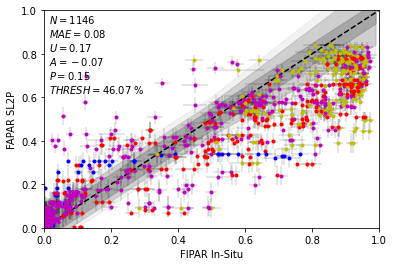

In [300]:
plotData(allDatafAPAR,'fIPAR','samplefAPAR',50,'E:\wp3\Validation\FAPARGBOV.png')

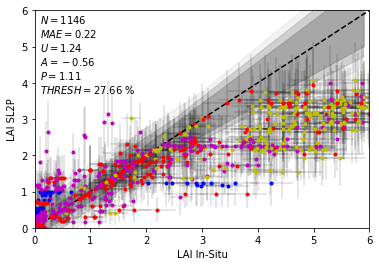

In [301]:
plotData(allDataLAI,'LAI_Miller','sampleLAI',20,'E:\wp3\Validation\LAIGBOV.png')